In [1]:
# Importando bibliotecas
import cv2
import numpy as np

In [2]:
# Carrega um vídeo para análise do arquivo especificado
cap = cv2.VideoCapture("videos/walking.avi")

In [3]:
# Lê o primeiro frame do vídeo
ret, frame = cap.read()

In [4]:
# Converte o primeiro frame para escala de cinza
frame_gray_init = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [5]:
# Cria uma matriz HSV (hue, saturation, value) com as mesmas dimensões e tipo do frame
mask = np.zeros_like(frame)
mask[..., 1] = 255

In [6]:
# Loop para processar cada frame do vídeo
while(1):
    ret, frame2 = cap.read()
    if not ret:
        print('Nenhum quadro capturado!')
        break
    frame_gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    # Calcula o fluxo óptico usando o método de Farneback
    flow = cv2.calcOpticalFlowFarneback(frame_gray_init, frame_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    # Componentes do fluxo são convertidas de coordenadas cartesianas para polares
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    mask[..., 0] = ang*180/np.pi/2
    mask[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

    # Convercão para a imagem BGR
    bgr = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)

    cv2.imshow('frame2', bgr)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    elif k == ord('s'):
        cv2.imwrite('opticalfb.png', frame2)
        cv2.imwrite('opticalhsv.png', bgr)
    frame_gray_init = frame_gray

# Fecha todas as janelas abertas e libera a captura de vídeo
cap.release()
cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

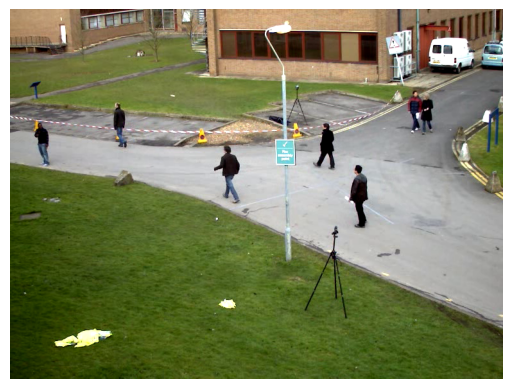

In [8]:
# Carrega a imagem
img1 = mpimg.imread('opticalfb.png')

# Exibe a imagem
plt.imshow(img1)
plt.axis('off')  # Desativa os eixos
plt.show()

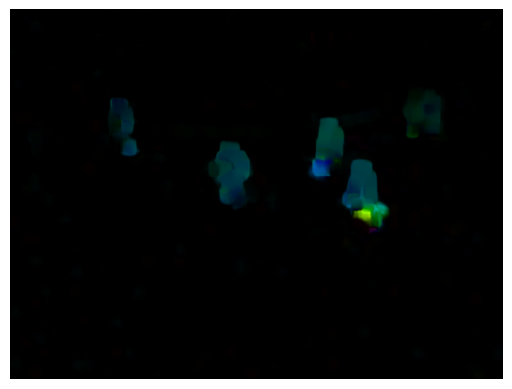

In [9]:
# Carrega a imagem
img2 = mpimg.imread('opticalhsv.png')

# Exibe a imagem
plt.imshow(img2)
plt.axis('off')  # Desativa os eixos
plt.show()